# SMAI Assignment - 2

## Question 3: Face Recognition using Principal Component Analysis

This question requires you to create a basic facial recognition system using a technique called principal component analysis (PCA) 
by projecting the face images on the feature space (face space) which best
represents the variations among distinct faces. The face space is defined as the
“Eigenfaces", which are the eigenvectors of the set of faces.

The goal of implementing this system is to recognize a person's face by comparing it to a pre-existing database of faces, and identifying the closest match.

Link to paper on Eigenfaces: [https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf)

The AT&T face dataset contains a set of grayscale face images with dimensions 92x112. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). These 10 images per person are taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). <b>Link:</b> [https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/](https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/)

#### Tasks
1. Load dataset and divide the date into training and test sets. 
2. Implement the PCA algorithm from scratch.
3. Implement image reconstruction using the eigen projections and visualise differences for different number of components.
4. Visualise the mean(Eigen face) generated.
5. Given training set, obtain accuracy by attempting a face regonition module and obtaining the accuracy for different number of principal components.

#### Import Libraries

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import cv2
from copy import copy
from tqdm import tqdm
import random

#### Import Dataset
Assign labels for the images based on the subdirectories to obtain X(images array) and y (labels).

Ensure that the test data contains atleast one image from each category.

In [16]:
trainAmt = 0.9
allFaces = []
labels = []

for i in range(1,41):
    for j in range(1,11):
        imgPath = os.path.join("ATnT", "s" + str(i), str(j) + ".pgm")
        img = cv2.imread(imgPath, -1)

        allFaces.append(img)
        labels.append(i)

# shuffle
randomOrder = np.random.permutation(len(labels))
allFaces = np.array(allFaces)[randomOrder]
labels = np.array(labels)[randomOrder]

# split
trainFaces = allFaces[:int(trainAmt*len(allFaces))]
trainLabels = labels[:int(trainAmt*len(allFaces))]

testFaces = allFaces[int(trainAmt*len(allFaces)): ]
testLabels = labels[int(trainAmt*len(allFaces)): ]

# 112x92 (= 10304) grayscale images,  360 in train, 40 in test
print(trainFaces.shape, trainLabels.shape)
print(testFaces.shape, testLabels.shape)

(360, 112, 92) (360,)
(40, 112, 92) (40,)


#### Implement PCA Algorithm.

Explain your steps with comments and write a brief explanation of the method.

In [17]:
def principalComponentAnalysis(X, numComponents):
    """
    The function return the eigen vectors (principal components) also termed "Eigen faces"
    """
    n_samples, h, w = X.shape                       # finding the shape
    A = X.reshape(n_samples, h*w).astype('float32') # flattening 
    mean = np.mean(A, axis=0)                       # calculating the mean
    A -= mean                                       # cetering around origin
    C = np.dot(A, A.T) / n_samples                  # covarience
    eigenvalues, eigenvectors = np.linalg.eigh(C)   # extracting the eighen value and eighen vector
    idx = np.argsort(eigenvalues)[::-1]             # sort the eighen values
    eigenvectors = eigenvectors[:,idx][:,:numComponents] # extract top components
    eigenfaces = np.dot(A.T, eigenvectors)          # This yields the eigenfaces
    eigenfaces = eigenfaces / np.linalg.norm(eigenfaces, axis=0) # normalized eighenfaces
    
    return eigenfaces, mean, h, w, eigenvalues

In [29]:
def visualize_eigenfaces(eigenfaces, n_eigenfaces=10):
    num_rows = (n_eigenfaces + 9) // 10
    fig, axes = plt.subplots(num_rows, 10, figsize=(20, 8))
    for i, ax in enumerate(axes.flat):
        if i < n_eigenfaces:
            ax.imshow(eigenfaces[:, i].reshape(112, 92), cmap='gray')
            ax.set_title(f'Eigenface {i+1}')
            ax.axis('off')
        else:
            ax.axis('off') 
    plt.show()


#### Implement Image Reconstruction from Eigenfaces


Explain your steps with comments and write a brief explanation of the method.

In [33]:
def imageReconstruction(testFace, eigenfaces, meanFace):
    """
    Helper function to reconstruct images
    """
    weights = np.dot(testFace, eigenfaces)
    # print(weights.shape)
    # print(testFace.shape)
    # print(eigenfaces.shape)
    reconstructed = np.dot(weights, eigenfaces.T)
    print(reconstructed.shape)
    reconstructed += meanFace
    reconstructed = reconstructed.reshape(-1, 112, 92)
    return reconstructed

In [34]:
%matplotlib inline
def plot_images(original, reconstructed, n=10):
    plt.figure(figsize=(20, 5))
    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i], cmap='gray')
        plt.title("Original")
        plt.axis('off')

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i], cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')
    plt.show()



==============================>>> Eighen Faces <<<==============================



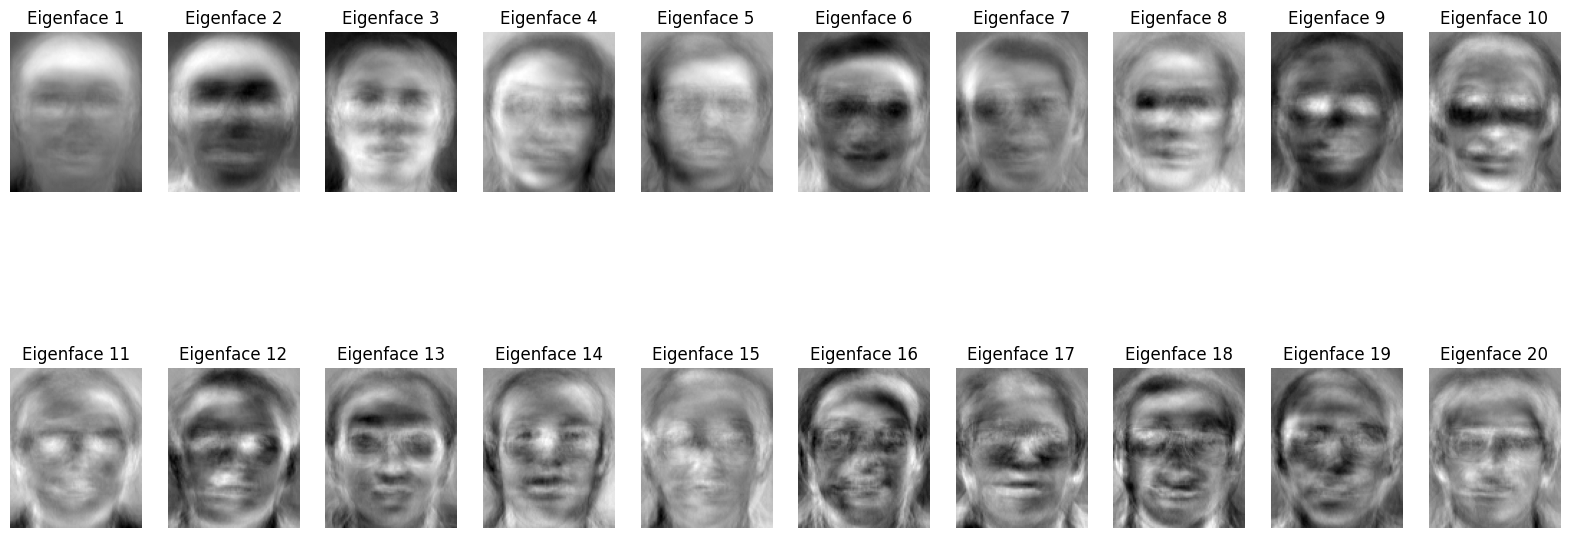



==============================>>> Reconstruction of Faces <<<==============================

(360, 10304)


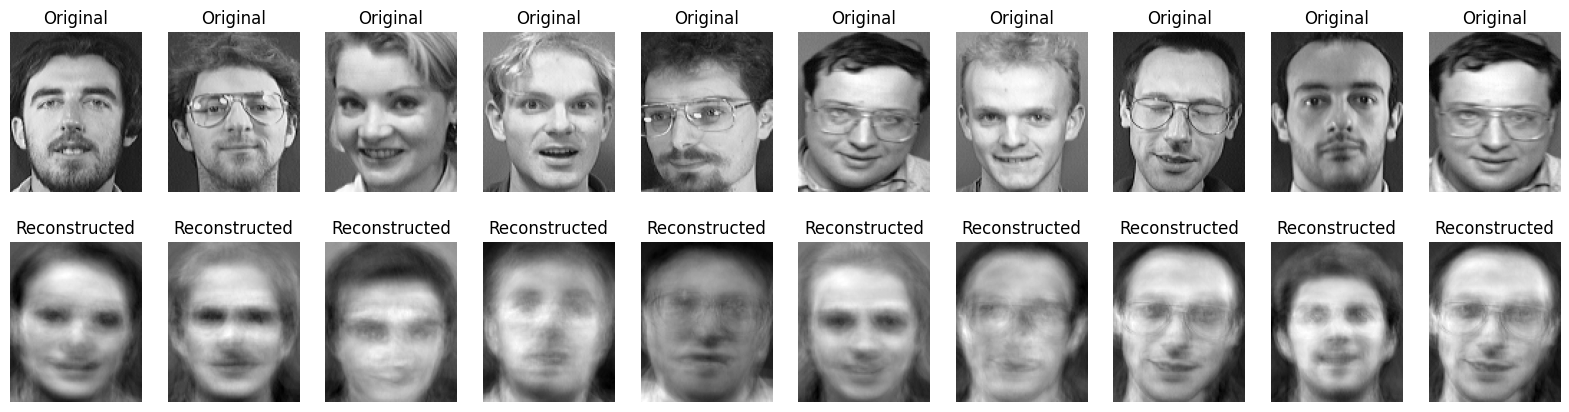

In [35]:
# Driver till now

numComponents = 20

n_samples = len(allFaces)
trainAmt = 0.9
randomOrder = np.random.permutation(n_samples)
allFaces, labels = allFaces[randomOrder], labels[randomOrder]

print("\n\n==============================>>> Eighen Faces <<<==============================\n")
eigenfaces, mean, h, w, _ = principalComponentAnalysis(trainFaces, numComponents)
visualize_eigenfaces(eigenfaces,numComponents)

# visualize_eigenfaces(mean, numComponents)

print("\n\n==============================>>> Reconstruction of Faces <<<==============================\n")
A = trainFaces.reshape(len(trainFaces), h*w).astype('float32') - mean
reconstructed_images = imageReconstruction(A, eigenfaces, mean)

original_images = allFaces[:]
reconstructed_subset = reconstructed_images[:]
plot_images(original_images, reconstructed_subset)

#### Visualisation
Visualise the results for different number of factors(pc = 5, 10, 50, 100, etc.)

**Note:** Ensure that the images are labelled appropriately.

(40, 10304)
Reconstruction with 5 components:
varience explained: 56.107532628854614%


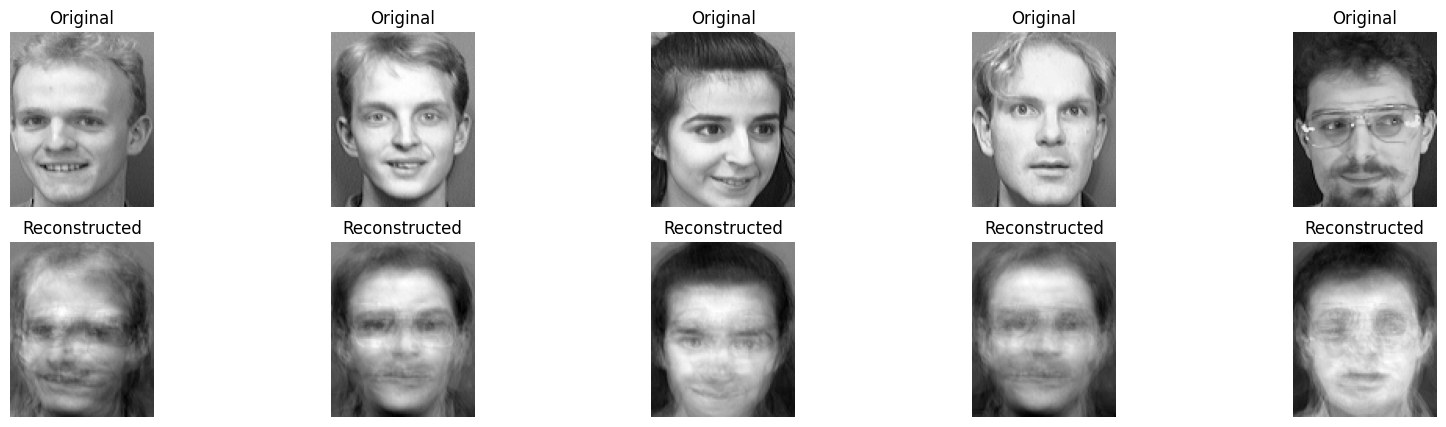

(40, 10304)
Reconstruction with 10 components:
varience explained: 72.03794997305195%


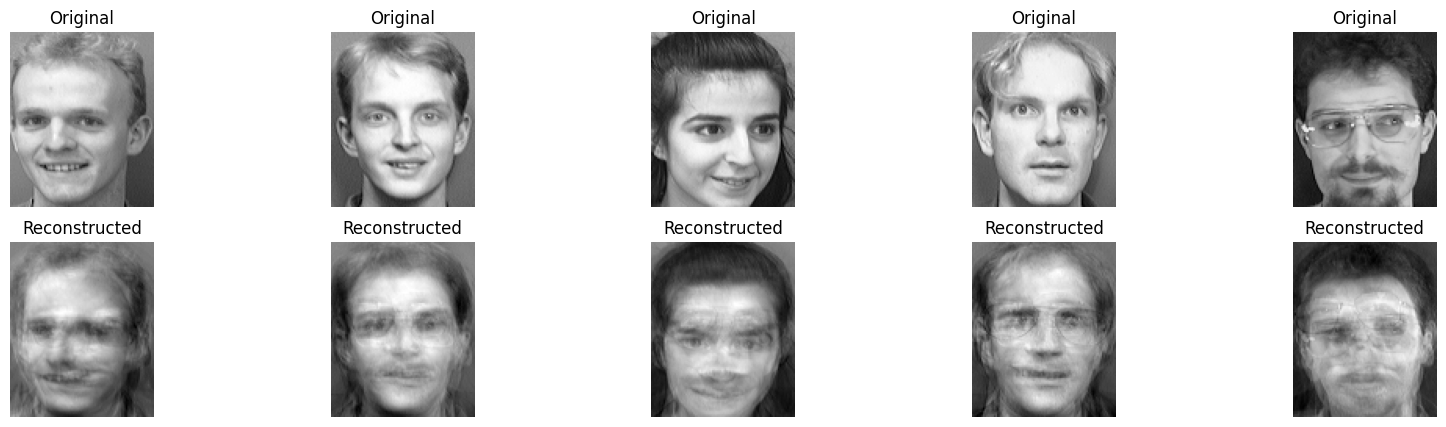

(40, 10304)
Reconstruction with 20 components:
varience explained: 87.66735017288488%


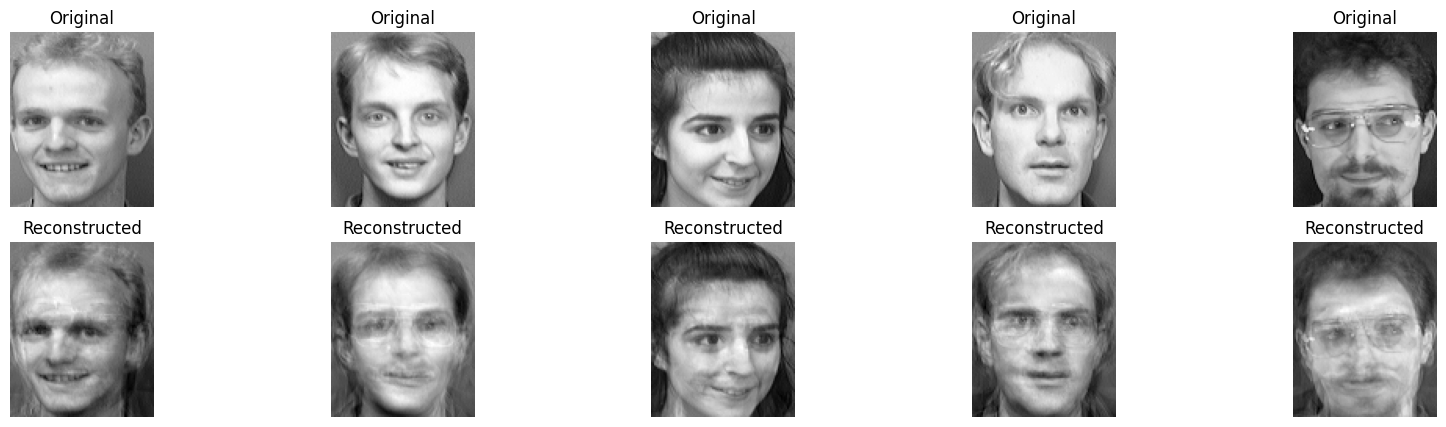

(40, 10304)
Reconstruction with 30 components:
varience explained: 95.93942175380118%


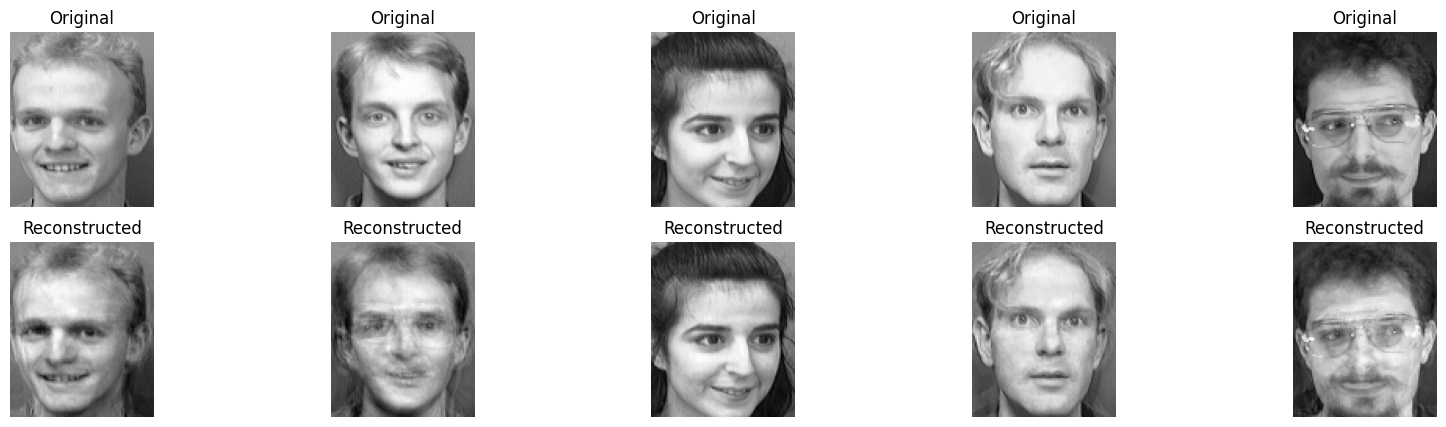

(40, 10304)
Reconstruction with 35 components:
varience explained: 98.57248061955684%


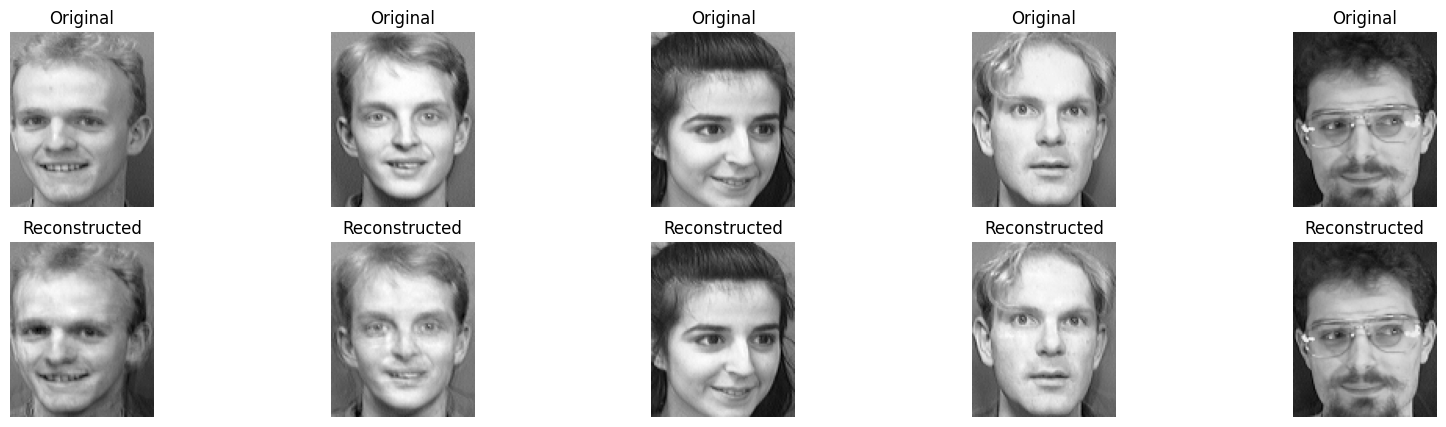

(40, 10304)
Reconstruction with 100 components:
varience explained: 100.0%


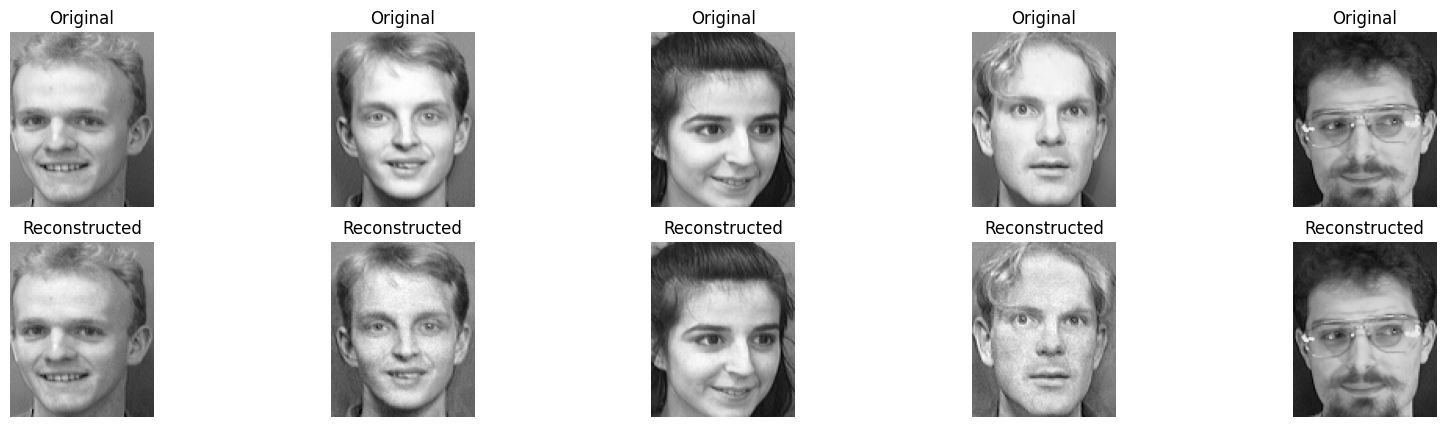

(40, 10304)
Reconstruction with 1000 components:
varience explained: 100.0%


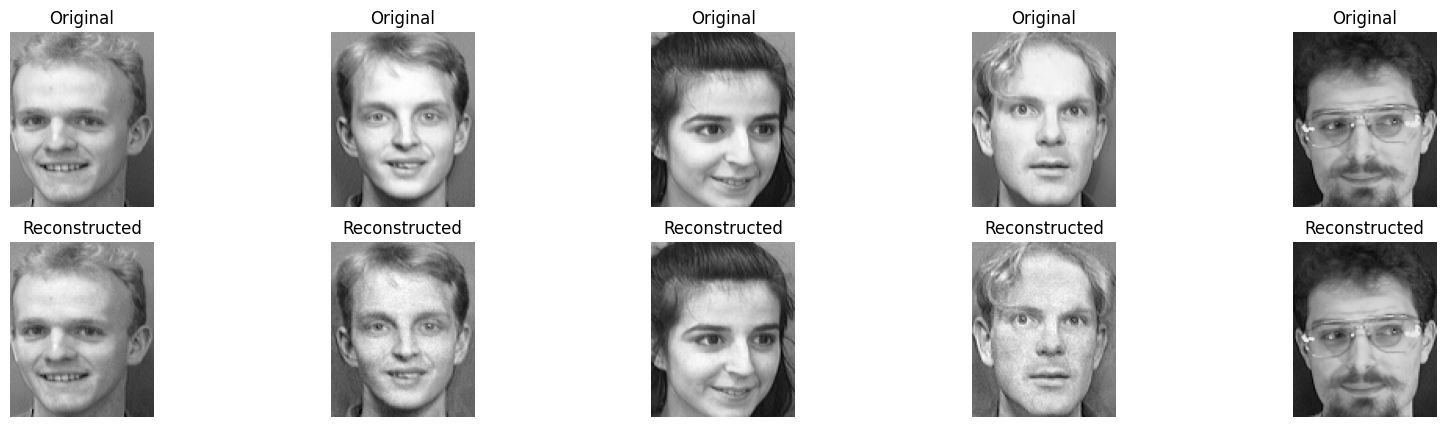

In [43]:
%matplotlib inline

def displayNfactors(factors, original_images):
    for numComponents in factors:
        eigenfaces, mean, _, _, eigenvalues = principalComponentAnalysis(original_images, numComponents)
        reconstructed_images = imageReconstruction(original_images.reshape(-1, 112*92).astype('float32') - mean, eigenfaces, mean)
        eigenvalues[::-1].sort()
        varience_explained = sum(eigenvalues[:numComponents])/sum(eigenvalues)
        # print(eigenvalues)
        print(f"Reconstruction with {numComponents} components:")
        print(f"varience explained: {varience_explained*100}%")
        plot_images(original_images[:10], reconstructed_images[:10], n=5)


factors = (5, 10, 20, 30, 35, 100, 1000)
displayNfactors(factors, testFaces)

#### Implement face recognition module based on the norm
Explain your steps with comments and write a brief explanation of the method.

*   Test the module and report accuracies based on the number of components taken for a range of value and plot them. 
*   Also plot the mean square error vs the number of eigenvectors taken and report your observations. 
*   For further empirical analysis, plot the semi-log variant of the error plot obtained above.

In [37]:
def recognize_face(testProjection, trainProjections, trainLabels):
    distances = np.linalg.norm(trainProjections - testProjection, axis=1)
    index_of_min = np.argmin(distances)
    return trainLabels[index_of_min]

In [38]:
def getClass(testImage, eigenfaces, meanFace, trainFaces, trainLabels):
    testImageCentered = testImage.flatten() - meanFace
    testProjection = np.dot(testImageCentered, eigenfaces)
    
    trainProjections = project_faces(trainFaces, eigenfaces, meanFace)
    minErrorIndex, minError = recognize_face(testProjection, trainProjections, trainLabels)
    
    closestImage = trainFaces[minErrorIndex].reshape(testImage.shape)
    prediction = trainLabels[minErrorIndex]

    return closestImage, minError, prediction

Iterate through all the images in the test data and test the accuracy by taking different number of components

In [39]:
def calculate_mse(original, reconstructed):
    mse = np.mean((original - reconstructed) ** 2, axis=(1, 2))
    return np.mean(mse)

Accuracy with 1 components: 0.07
Accuracy with 3 components: 0.75
Accuracy with 5 components: 0.75
Accuracy with 7 components: 0.90
Accuracy with 9 components: 0.93
Accuracy with 11 components: 0.93
Accuracy with 13 components: 0.93
Accuracy with 15 components: 0.90
Accuracy with 17 components: 0.90
Accuracy with 19 components: 0.90
Accuracy with 21 components: 0.90
Accuracy with 23 components: 0.90
Accuracy with 25 components: 0.90
Accuracy with 27 components: 0.90
Accuracy with 29 components: 0.90
Accuracy with 31 components: 0.90
Accuracy with 33 components: 0.90
Accuracy with 35 components: 0.90
Accuracy with 37 components: 0.90
Accuracy with 39 components: 0.90
Accuracy with 41 components: 0.90
Accuracy with 43 components: 0.90
Accuracy with 45 components: 0.90
Accuracy with 47 components: 0.90
Accuracy with 49 components: 0.90
Accuracy with 51 components: 0.90
Accuracy with 53 components: 0.90
Accuracy with 55 components: 0.90
Accuracy with 57 components: 0.90
Accuracy with 59 co

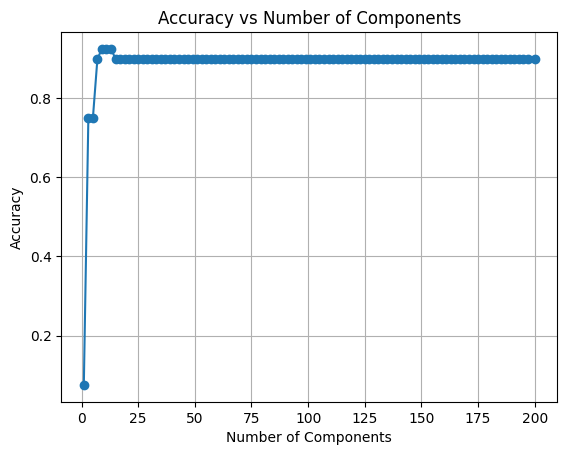

In [40]:
components = np.linspace(1, 200, 100, dtype=int)


def project_faces(X, eigenfaces, mean):
    X_centered = X - mean
    projections = np.dot(X_centered, eigenfaces)
    return projections

def reconstruct_faces(projections, eigenfaces, mean_face):
    reconstructed = np.dot(projections, eigenfaces.T) + mean_face
    reconstructed = reconstructed.reshape(-1, 112, 92)
    return reconstructed

def evaluate_components(components, trainFaces, trainLabels, testFaces, testLabels):
    accuracies = []
    mse_val = []
    log_mse_val = []
    for numComponents in components:
        eigenfaces, mean, _, _, eigenvalues = principalComponentAnalysis(trainFaces, numComponents)
        trainProjections = project_faces(trainFaces.reshape(-1, h*w).astype('float32'), eigenfaces, mean)
        testProjections = project_faces(testFaces.reshape(-1, h*w).astype('float32'), eigenfaces, mean)
        
        predictions = [recognize_face(testProjection, trainProjections, trainLabels) for testProjection in testProjections]
        accuracy = np.mean(predictions == testLabels)

        reconstructed_faces = reconstruct_faces(testProjections, eigenfaces, mean)
        mse = calculate_mse(testFaces, reconstructed_faces)
        log_mse = np.log(mse)
        mse_val.append(mse)
        log_mse_val.append(log_mse)
        print(f"Accuracy with {numComponents} components: {accuracy:.2f}")
        accuracies.append(accuracy)

    plt.plot(components, accuracies, marker='o')
    plt.xlabel('Number of Components')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Number of Components')
    plt.grid(True)
    plt.show()
    return mse_val, log_mse_val

mse_val, log_mse_val = evaluate_components(components, trainFaces, trainLabels, testFaces, testLabels)

### Observations

Accuracy initially jumps up as we add components, capturing key facial features like edges and positions of eyes, nose, and mouth. However, after a point, adding more components doesn't help much as they pick up minor variations and noise rather than essential features. There's a limit to how accurate we can get, showing that with just a few components, we can still recognize faces well without losing vital information.

Plot Number of eigenvectors vs Mean Square Error

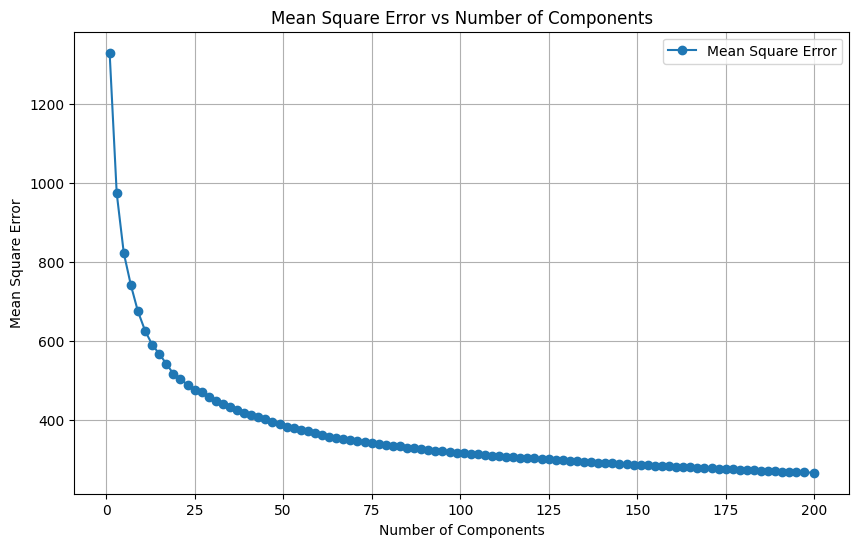

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(components, mse_val, marker='o', label='Mean Square Error')
plt.xlabel('Number of Components')
plt.ylabel('Mean Square Error')
plt.title('Mean Square Error vs Number of Components')
plt.grid(True)
plt.legend()
plt.show()

Plot Number of eigenvectors vs Logarithmic Mean Square Error

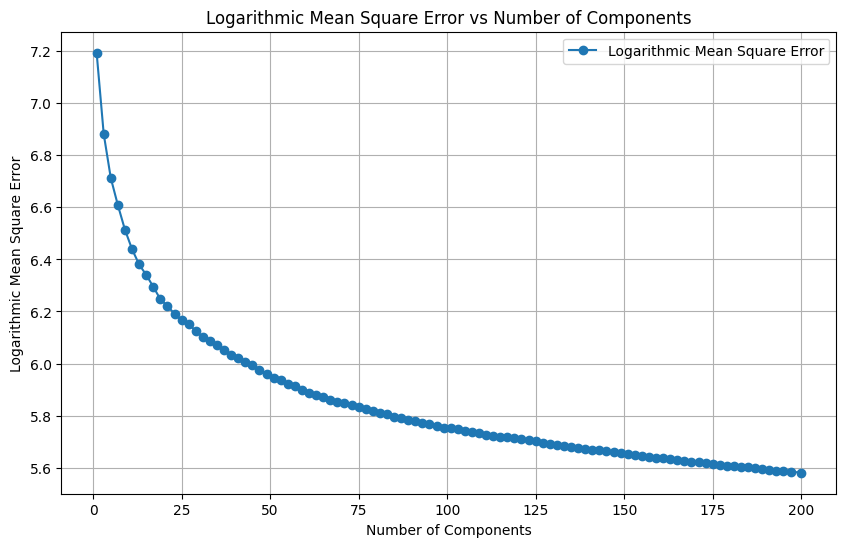

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(components, log_mse_val, marker='o', label='Logarithmic Mean Square Error')
plt.xlabel('Number of Components')
plt.ylabel('Logarithmic Mean Square Error')
plt.title('Logarithmic Mean Square Error vs Number of Components')
plt.grid(True)
plt.legend()
plt.show()